In [1]:
!sudo apt-get install -y fonts-Malgun
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,179 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120879 files and dire

In [3]:
pip install numpy

In [4]:
pip install pandas

In [5]:
pip install matplotlib

In [6]:
pip install scikit-learn

In [4]:
#구글코랩을 이용하여 진행
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')


#csv파일 업로드
titanic_df = pd.read_csv("titanic.csv")

In [6]:
#1.	생존자 중 몇 명인지 계산하세요
survivors_cnt = titanic_df[titanic_df['Survived'] == 1].shape[0]

print("생존자 중 몇 명인지 계산하세요:",survivors_cnt)

생존자 중 몇 명인지 계산하세요: 342


In [7]:
#2.	항구 "S"에서 탑승한 승객 수를 계산하세요.
portS_passengers = titanic_df[titanic_df['Embarked'] == 'S'].shape[0]

print("""항구 "S"에서 탑승한 승객 수를 계산하세요: """,portS_passengers)

항구 "S"에서 탑승한 승객 수를 계산하세요:  644


In [8]:
#3.	남성 승객 수를 계산하세요

male_passengers_cnt = titanic_df[titanic_df['Sex'] == 'male'].shape[0]

print("남성 승객 수를 계산하세요:",male_passengers_cnt)

남성 승객 수를 계산하세요: 577


In [9]:
#4.	3등실에 탑승하고 지불한 요금이 40.000 미만인 승객 수를 계산하세요.

class_3_under_40_count = titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Fare'] < 40)].shape[0]
print("3등실에 탑승하고 지불한 요금이 40.000 미만인 승객 수를 계산하세요:",class_3_under_40_count)

3등실에 탑승하고 지불한 요금이 40.000 미만인 승객 수를 계산하세요: 471


In [10]:
#5.	승객 ID가 674인 승객의 이름을 찾아보세요.
num674 = titanic_df[titanic_df['PassengerId'] == 674]['Name'].values[0]
print("승객 ID가 674인 승객의 이름을 찾아보세요.:",num674)

승객 ID가 674인 승객의 이름을 찾아보세요.: Wilhelms, Mr. Charles


In [11]:
#6.	승객들의 평균 나이를 계산하세요.
passengers_avg_age = titanic_df['Age'].mean()
print("승객들의 평균 나이를 계산하세요.:",passengers_avg_age)

승객들의 평균 나이를 계산하세요.: 29.69911764705882


In [12]:
#7.	생존자와 사망자의 수를 각각 계산하세요
survival_cnt = titanic_df['Survived'].value_counts()
survivor_cnt = survival_cnt[1]
dead_cnt = survival_cnt[0]
print("생존자와 사망자의 수를 각각 계산하세요")
print("생존자:",survivor_cnt)
print("사망자:",dead_cnt)

생존자와 사망자의 수를 각각 계산하세요
생존자: 342
사망자: 549


In [13]:
#8.	남성과 여성 승객 수를 계산하세요
gender_cnt = titanic_df['Sex'].value_counts()
male_cnt = gender_cnt['male']
female_cnt = gender_cnt["female"]
print("남성과 여성 승객 수를 계산하세요.")
print("남성:", male_cnt)
print("여성:",female_cnt)

남성과 여성 승객 수를 계산하세요.
남성: 577
여성: 314


In [14]:
#9.	각 성별에 따른 생존자와 사망자의 수를 계산하세요.[DataFrame. groupby() 함수 이용]
survival_gender_cnt = titanic_df.groupby('Sex')['Survived'].value_counts()
print("각 성별에 따른 생존자와 사망자의 수를 계산하세요.[DataFrame. groupby() 함수 이용]")
print("여성")
print("생존자:",survival_gender_cnt['female'][1])
print("사망자:",survival_gender_cnt['female'][0])

print("남성")
print("생존자:",survival_gender_cnt['male'][1])
print("사망자:",survival_gender_cnt['male'][0])

각 성별에 따른 생존자와 사망자의 수를 계산하세요.[DataFrame. groupby() 함수 이용]
여성
생존자: 233
사망자: 81
남성
생존자: 109
사망자: 468


In [15]:
#10.	각 등급별로 생존한 사람과 사망한 사람의 평균 지불 요금을 계산하세요[(DataFrame.pivot_table() 함수 이용)
class_survival = titanic_df.pivot_table(index='Pclass', columns='Survived', values='Fare', aggfunc='mean')

print("10.	각 등급별로 생존한 사람과 사망한 사람의 평균 지불 요금을 계산하세요[(DataFrame.pivot_table() 함수 이용)")

for i in range(1,len(class_survival)+1):
  print(i,"등급")
  for j in range(2):
    if j==0:
      p = "사망자:"
    else:
      p="생존자:"
    print(p, class_survival[j][i])

10.	각 등급별로 생존한 사람과 사망한 사람의 평균 지불 요금을 계산하세요[(DataFrame.pivot_table() 함수 이용)
1 등급
사망자: 64.68400749999999
생존자: 95.60802867647058
2 등급
사망자: 19.412327835051546
생존자: 22.0557
3 등급
사망자: 13.669364247311828
생존자: 13.694887394957984


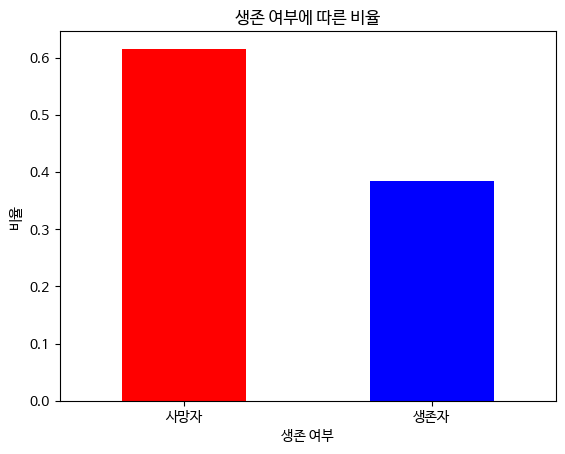

In [20]:
#1.	탑승자의 생존 여부에 대한 비율을 계산하고, 이 비율을 막대 그래프로 시각화.
survival_ratio = titanic_df['Survived'].value_counts(normalize=True)

survival_ratio.index = ['사망자', '생존자']

# Plotting with the updated index
survival_ratio.plot(kind='bar', color=['red', 'blue'])
plt.title('생존 여부에 따른 비율')
plt.xlabel('생존 여부')
plt.ylabel('비율')
plt.xticks(rotation=0)
plt.show()

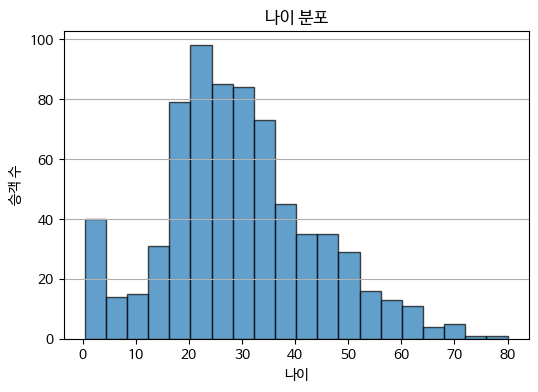

In [23]:
#2.	나이 열의 분포를 20개의 구간(bin)으로 나누어 히스토그램으로 시각화
plt.figure(figsize=(6, 4))
plt.hist(titanic_df['Age'].dropna(), bins=20, edgecolor='black', alpha=0.7)  # dropna() to ignore missing values
plt.title('나이 분포')
plt.xlabel('나이')
plt.ylabel('승객 수')
plt.grid(axis='y')
plt.show()

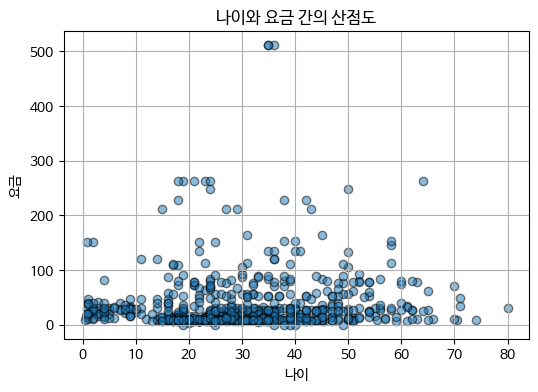

In [24]:
#3.	나이와 요금 간의 산점도 시각화

plt.figure(figsize=(6, 4))
plt.scatter(titanic_df['Age'], titanic_df['Fare'], alpha=0.5, edgecolor='black')
plt.title('나이와 요금 간의 산점도')
plt.xlabel('나이')
plt.ylabel('요금')
plt.grid(True)
plt.show()

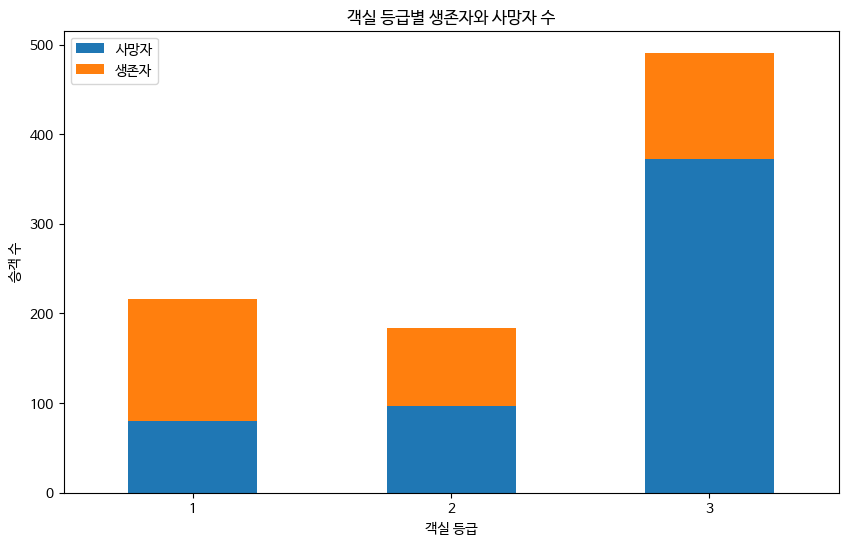

In [25]:
#4.	객실 등급(Pclass)별로 생존자와 사망자 수를 막대그래프로 시각화.

class_survival_counts = titanic_df.groupby(['Pclass', 'Survived']).size().unstack()

class_survival_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('객실 등급별 생존자와 사망자 수')
plt.xlabel('객실 등급')
plt.ylabel('승객 수')
plt.xticks(rotation=0)
plt.legend(['사망자', '생존자'])
plt.show()